# Standard Library Analysis

In [1]:
import pickle
import numpy as np
import pandas as pd

from analysis_utils import count_libraries_usage, count_components_usage, show_popularity

## Data Load and Setup

In [2]:
ipynb_jupyter_repos = pd.read_parquet('../data/ipynb_component_counter_jupyter_repos.parquet')
ipynb_jupyter_repos

,filename,module,component_type,component_name,count
0,/media/tobiasz/crucial/jupyter_repos/-PyTorch-...,math,function,sqrt,2
1,/media/tobiasz/crucial/jupyter_repos/-PyTorch-...,copy,function,deepcopy,1
2,/media/tobiasz/crucial/jupyter_repos/-PyTorch-...,os,attribute,path,2
3,/media/tobiasz/crucial/jupyter_repos/02_Python...,random,function,shuffle,1
4,/media/tobiasz/crucial/jupyter_repos/02_Python...,decimal,class,Decimal,1
...,...,...,...,...,...
119732,/media/tobiasz/crucial/jupyter_repos/ztdl-mast...,base64,function,b64encode,1
119733,/media/tobiasz/crucial/jupyter_repos/ztdl-mast...,io,method,getvalue,1
119734,/media/tobiasz/crucial/jupyter_repos/ztdl-mast...,gzip,function,open,2
119735,/media/tobiasz/crucial/jupyter_repos/ztdl-mast...,gzip,function,open,2


In [3]:
py_jupyter_repos = pd.read_parquet('../data/py_component_counter_jupyter_repos.parquet')
py_jupyter_repos

,filename,module,component_type,component_name,count
0,/media/tobiasz/crucial/jupyter_repos/-PyTorch-...,xml.etree.ElementTree,method,iter,1
1,/media/tobiasz/crucial/jupyter_repos/-PyTorch-...,os,attribute,path,5
2,/media/tobiasz/crucial/jupyter_repos/-PyTorch-...,xml.etree.ElementTree,attribute,tag,6
3,/media/tobiasz/crucial/jupyter_repos/-PyTorch-...,xml.etree.ElementTree,method,append,2
4,/media/tobiasz/crucial/jupyter_repos/-PyTorch-...,xml.etree.ElementTree,attribute,text,4
...,...,...,...,...,...
285187,/media/tobiasz/crucial/jupyter_repos/zoobot/be...,os,function,mkdir,1
285188,/media/tobiasz/crucial/jupyter_repos/zoobot/be...,os,function,listdir,2
285189,/media/tobiasz/crucial/jupyter_repos/zoobot/be...,os,attribute,path,5
285190,/media/tobiasz/crucial/jupyter_repos/ztdl-mast...,tempfile,function,NamedTemporaryFile,1


In [4]:
ipynb_jupyter_repos['repo'] = ipynb_jupyter_repos['filename'].str.split('/').str[5]
ipynb_jupyter_repos['filename'] = ipynb_jupyter_repos.apply(lambda row: row['filename'].split(row['repo'])[-1], axis=1).str[1:]
ipynb_jupyter_repos = ipynb_jupyter_repos[['repo', 'filename', 'module', 'component_type', 'component_name', 'count']]
ipynb_jupyter_repos

,repo,filename,module,component_type,component_name,count
0,-PyTorch-,07_注意力自注意力多头注意力/attention.ipynb,math,function,sqrt,2
1,-PyTorch-,07_注意力自注意力多头注意力/attention.ipynb,copy,function,deepcopy,1
2,-PyTorch-,01_手把手教你跑通第一个神经网络/01_手把手教你跑通第一个神经网络.ipynb,os,attribute,path,2
3,02_Python_Datatypes,001_Python_Numbers.ipynb,random,function,shuffle,1
4,02_Python_Datatypes,001_Python_Numbers.ipynb,decimal,class,Decimal,1
...,...,...,...,...,...,...
119732,ztdl-masterclasses,notebooks/Pre-trained_Models.ipynb,base64,function,b64encode,1
119733,ztdl-masterclasses,notebooks/Pre-trained_Models.ipynb,io,method,getvalue,1
119734,ztdl-masterclasses,notebooks/Natural_Language_Processing.ipynb,gzip,function,open,2
119735,ztdl-masterclasses,notebooks/Word_Embeddings.ipynb,gzip,function,open,2


In [5]:
py_jupyter_repos['repo'] = py_jupyter_repos['filename'].str.split('/').str[5]
py_jupyter_repos['filename'] = py_jupyter_repos.apply(lambda row: row['filename'].split(row['repo'])[-1], axis=1).str[1:]
py_jupyter_repos = py_jupyter_repos[['repo', 'filename', 'module', 'component_type', 'component_name', 'count']]
py_jupyter_repos

,repo,filename,module,component_type,component_name,count
0,-PyTorch-,05_Dataset数据集实例讲解，CSV数据&VOC格式/flame_dataset_se...,xml.etree.ElementTree,method,iter,1
1,-PyTorch-,05_Dataset数据集实例讲解，CSV数据&VOC格式/flame_dataset_se...,os,attribute,path,5
2,-PyTorch-,05_Dataset数据集实例讲解，CSV数据&VOC格式/flame_dataset_se...,xml.etree.ElementTree,attribute,tag,6
3,-PyTorch-,05_Dataset数据集实例讲解，CSV数据&VOC格式/flame_dataset_se...,xml.etree.ElementTree,method,append,2
4,-PyTorch-,05_Dataset数据集实例讲解，CSV数据&VOC格式/flame_dataset_se...,xml.etree.ElementTree,attribute,text,4
...,...,...,...,...,...,...
285187,zoobot,benchmarks/tensorflow/deprecated/single_task_v...,os,function,mkdir,1
285188,zoobot,benchmarks/tensorflow/deprecated/single_task_v...,os,function,listdir,2
285189,zoobot,benchmarks/tensorflow/deprecated/single_task_v...,os,attribute,path,5
285190,ztdl-masterclasses,tests/test_nb.py,tempfile,function,NamedTemporaryFile,1


## Most Popular Libraries and their Components

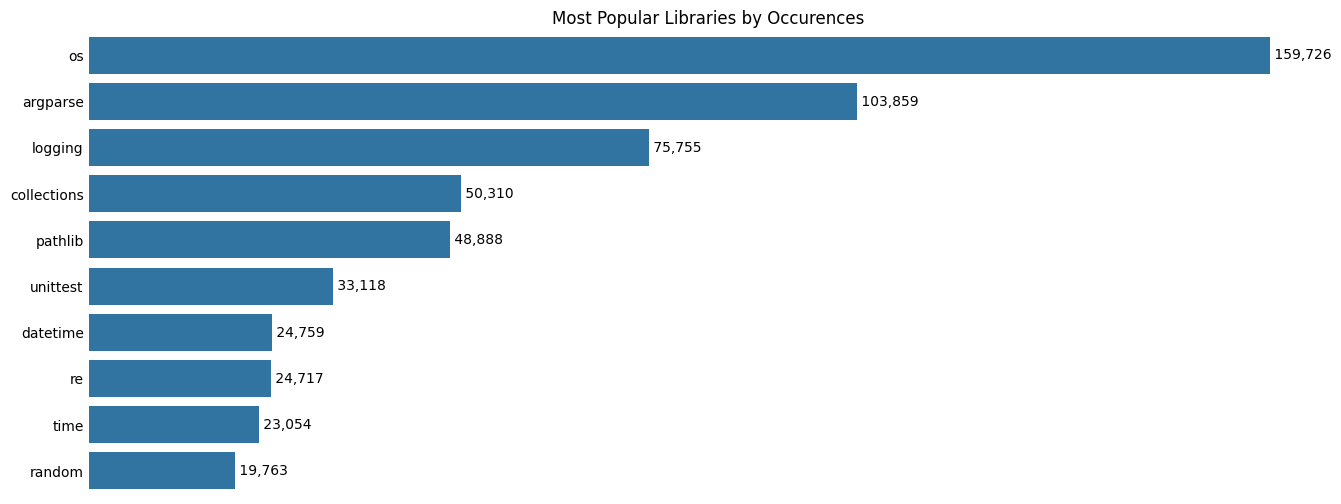

In [6]:
show_popularity(count_libraries_usage(py_jupyter_repos, 'occurences'), 'Most Popular Libraries by Occurences')

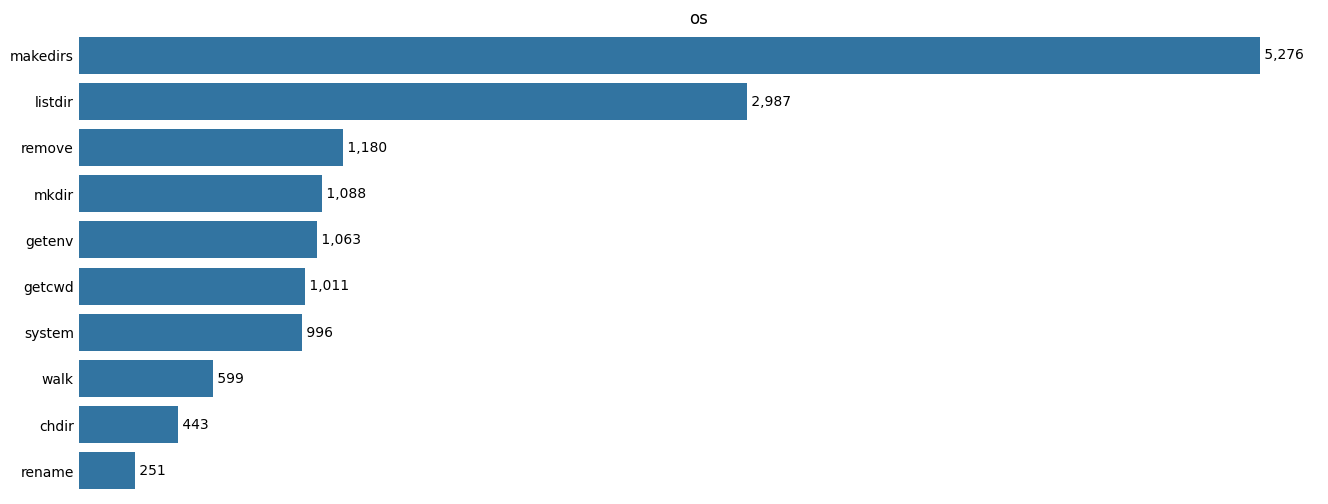

In [11]:
show_popularity(count_components_usage(py_jupyter_repos, 'os', by='files', component_types=('function',)), title='os')

In [8]:
# with open('../data/jupyter_repos_metadata.pickle', "rb") as f:
#     jupyter_repos_metadata = pickle.load(f)

In [9]:
# jupyter_repos_metadata